In [1]:
# Load IBMQ Account data
from qiskit import IBMQ
IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_casablanca')

/Users/suau/PycharmProjects/open-science-prize/venv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
from osp.partition import partition_edges, sorted_partitions_by_cancellation, _get_cancellation_number

from osp.cross_talk import to_cross_talk_impact, benchmarks
cross_talk_impacts = to_cross_talk_impact(benchmarks[0]["single_cx_errors"], benchmarks[0]["cross_talk_errors"])

partitions = partition_edges(backend, cross_talk_impacts)
original_cancellation_number = _get_cancellation_number(partitions)
sorted_partitions = sorted_partitions_by_cancellation(backend, partitions)
cancellation_number = _get_cancellation_number(sorted_partitions)


In [3]:
print(partitions)
print(sorted_partitions)
print(original_cancellation_number)
print(cancellation_number)

[[(1, 3)], [(3, 5)], [(0, 1), (4, 5)], [(1, 2), (5, 6)]]
[[(3, 1)], [(1, 2), (6, 5)], [(5, 3)], [(1, 0), (5, 4)]]
5
5


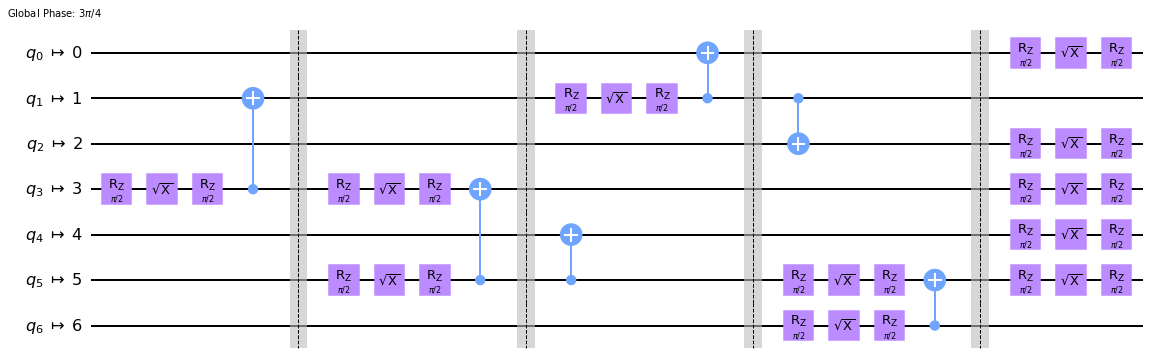

In [4]:
from osp.graph_state import graph_state_circuit
from qiskit import transpile
circuit = graph_state_circuit(backend, partitions)
circuit.draw(output="mpl")
transpile(circuit, backend=backend).draw(output="mpl")

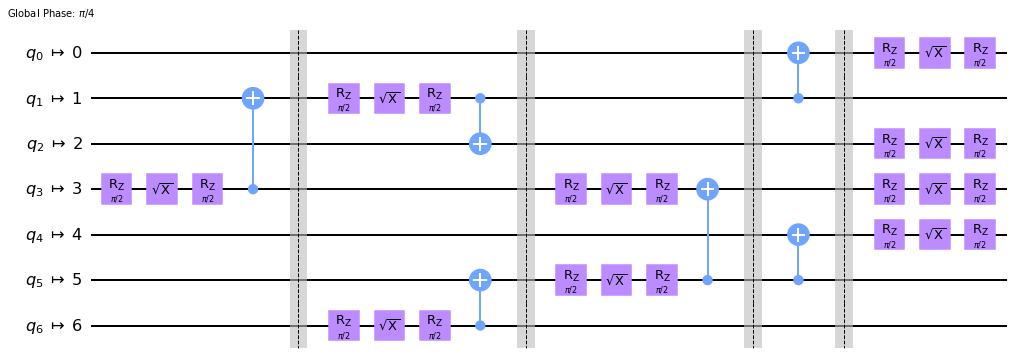

In [5]:
sorted_circuit = graph_state_circuit(backend, sorted_partitions)
transpile(sorted_circuit, backend=backend).draw(output="mpl")

[[(3, 5)], [(0, 1), (4, 5)], [(1, 2), (5, 6)], [(1, 3)]]
5


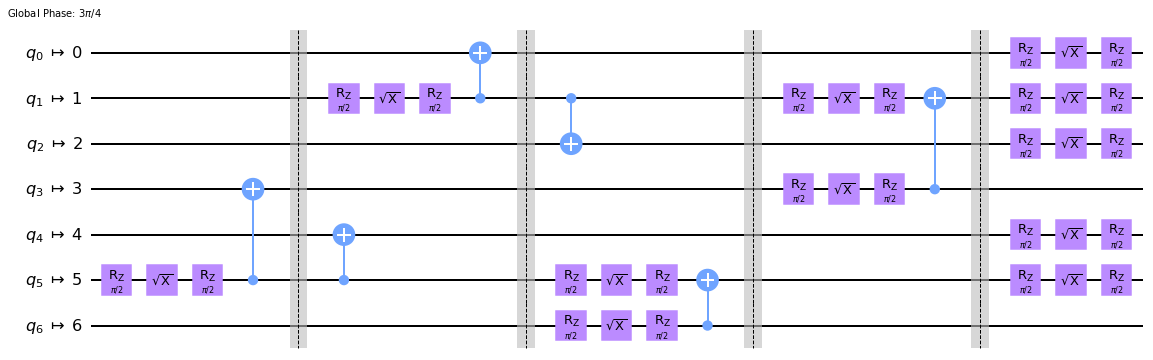

In [6]:
from random import shuffle
from copy import deepcopy
shuffled_partitions = deepcopy(partitions)
shuffle(shuffled_partitions)
print(shuffled_partitions)
print(_get_cancellation_number(shuffled_partitions))
shuffled_circuit = graph_state_circuit(backend, shuffled_partitions)
transpile(shuffled_circuit, backend=backend).draw(output="mpl")